# Employee Salary Prediction

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df=pd.read_csv(r"C:\Users\soumy\Desktop\internship\AI_ML_project\salary_prediction_dataset.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,estimated-income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,33966
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,43203
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,77410
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,85393
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,38041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,30500
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,65100
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,33053
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,25486


In [49]:
df.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
educational-num     0
marital-status      0
occupation          0
relationship        0
race                0
gender              0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
estimated-income    0
dtype: int64

In [50]:
df.shape

(48842, 15)

In [51]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [52]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

## Missing value handling

In [54]:
# replacing '?' in the fields with meaningful values
df.occupation.replace({'?':'Others'},inplace=True)
df.workclass.replace({'?':'NotListed'},inplace=True)

In [55]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NotListed            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [56]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

## Outlier Removal, Feature Minimization/Noise Reduction done ahead

In [57]:
#removing 'Protective-serv', 'Priv-house-serv' and 'Armed-Forces' entries as they serve no/negligible significant studies
df=df[df['occupation'] != 'Protective-serv']
df=df[df['occupation'] != 'Priv-house-serv']
df=df[df['occupation'] != 'Armed-Forces']

In [58]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Name: count, dtype: int64

In [59]:
#removing 'Without-pay' & 'Never-worked' entries from workclass as they are not getting a salary
df=df[df['workclass'] != 'Without-pay']
df=df[df['workclass'] != 'Never-worked']

In [60]:
df.workclass.value_counts()

workclass
Private             33365
Self-emp-not-inc     3855
NotListed            2799
Local-gov            2686
State-gov            1806
Self-emp-inc         1690
Federal-gov          1370
Name: count, dtype: int64

In [61]:
df.education.value_counts()

education
HS-grad         15346
Some-college    10535
Bachelors        7865
Masters          2634
Assoc-voc        1988
11th             1773
Assoc-acdm       1546
10th             1367
7th-8th           924
Prof-school       832
9th               731
12th              637
Doctorate         592
5th-6th           488
1st-4th           232
Preschool          81
Name: count, dtype: int64

In [62]:
#removing '5th-6th', '1st-4th' & 'Preschool' entries from education as they are not employees or get a salary
df=df[df['education'] != '1st-4th']
df=df[df['education'] != 'Preschool']
df=df[df['education'] != '5th-6th']

In [63]:
#also removing '7th-8th' & '9th' as not that imp
df=df[df['education'] != '7th-8th']
df=df[df['education'] != '9th']
df.education.value_counts()

education
HS-grad         15346
Some-college    10535
Bachelors        7865
Masters          2634
Assoc-voc        1988
11th             1773
Assoc-acdm       1546
10th             1367
Prof-school       832
12th              637
Doctorate         592
Name: count, dtype: int64

In [64]:
df.shape

(45115, 15)

In [65]:
# removing education column as it is redundant with edu-num
# and we need edu-num for the numerical values
df.drop(columns=['education'],inplace=True)

In [66]:
df.head(5)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,estimated-income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,33966
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,43203
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,85393
4,18,NotListed,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,38041
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,32136


In [67]:
df.shape

(45115, 14)

In [68]:
#NOISE_REDUCTION
#we don't need the relationship field for the prediction, and capital-gain & loss columns don't have significant roles because of negligible entries
#'fnlegt' also not very important
#so we will be dropping them
df.drop(columns=['relationship'],inplace=True)
df.drop(columns=['capital-gain'],inplace=True)
df.drop(columns=['capital-loss'],inplace=True)
df.drop(columns=['fnlwgt'],inplace=True)

In [69]:
df.shape

(45115, 10)

In [70]:
df.head(5)

,age,workclass,educational-num,marital-status,occupation,race,gender,hours-per-week,native-country,estimated-income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,40,United-States,33966
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,43203
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,85393
4,18,NotListed,10,Never-married,Others,White,Female,30,United-States,38041
5,34,Private,6,Never-married,Other-service,White,Male,30,United-States,32136


In [71]:
#also 'race' is very sensitive data field and shouldn't be involved in salary prediction
df.drop(columns=['race'],inplace=True)

In [72]:
df.head(5)

,age,workclass,educational-num,marital-status,occupation,gender,hours-per-week,native-country,estimated-income
0,25,Private,7,Never-married,Machine-op-inspct,Male,40,United-States,33966
1,38,Private,9,Married-civ-spouse,Farming-fishing,Male,50,United-States,43203
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Male,40,United-States,85393
4,18,NotListed,10,Never-married,Others,Female,30,United-States,38041
5,34,Private,6,Never-married,Other-service,Male,30,United-States,32136


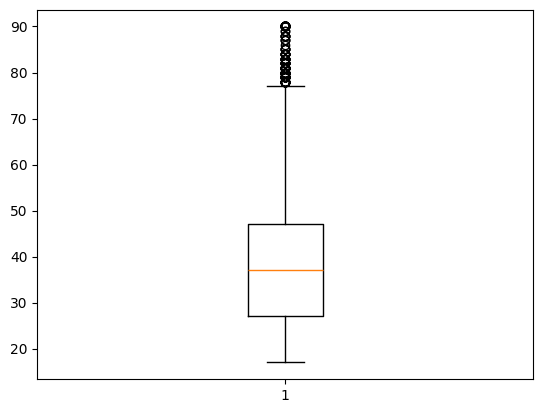

In [73]:
#finding outliers and removing them
#OUTLIER REMOVAL
plt.boxplot(df['age'])
plt.show()

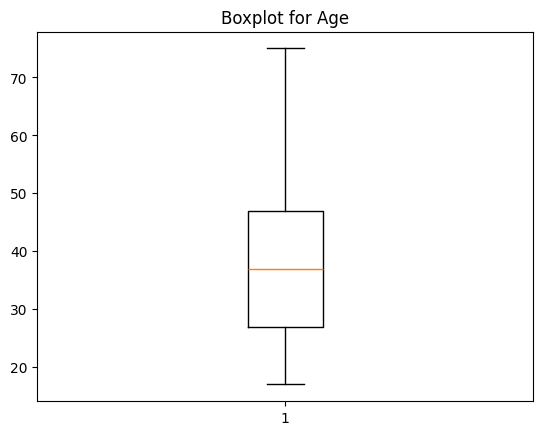

In [74]:
df=df[(df['age']<=75)&(df['age']>=17)]
plt.boxplot(df['age'])
plt.title('Boxplot for Age')
plt.show()

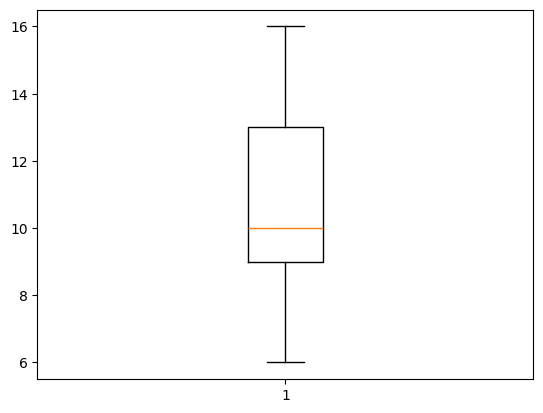

In [75]:
#for educational-num
plt.boxplot(df['educational-num'])
plt.show()

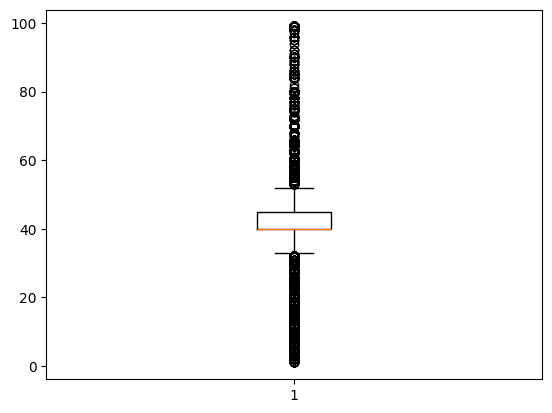

In [76]:
#for hours-per-week
plt.boxplot(df['hours-per-week'])
plt.show()

# Data Visualization done ...

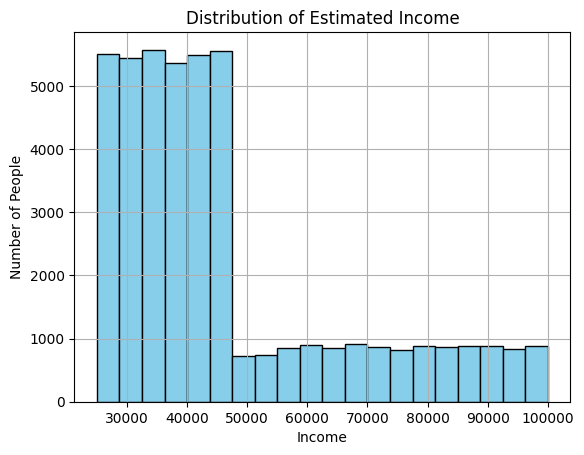

In [77]:
plt.hist(df['estimated-income'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Estimated Income')
plt.xlabel('Income')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

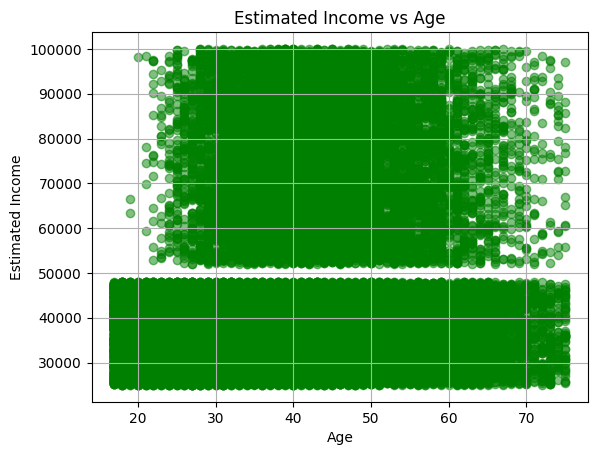

In [80]:
plt.scatter(df['age'], df['estimated-income'], alpha=0.5, color='green')
plt.title('Estimated Income vs Age')
plt.xlabel('Age')
plt.ylabel('Estimated Income')
plt.grid(True)
plt.show()

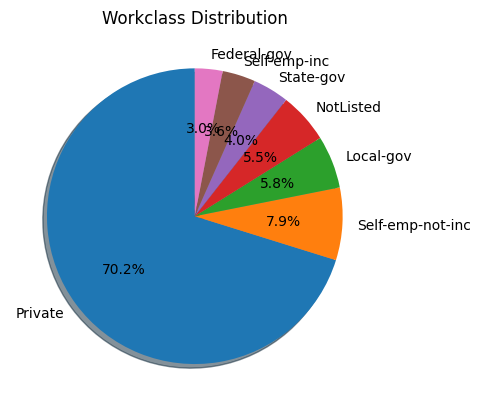

In [81]:
df['workclass'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Workclass Distribution')
plt.ylabel('')
plt.show()

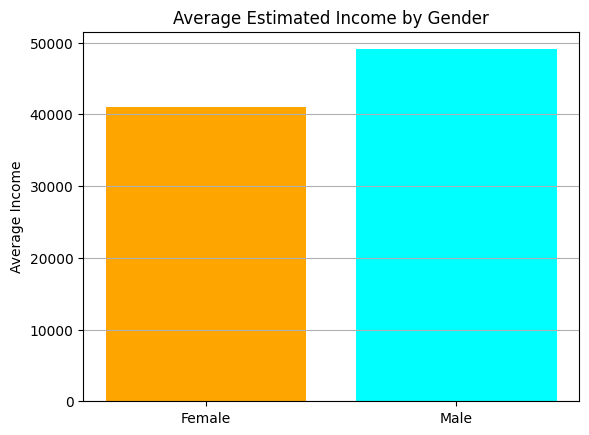

In [82]:
avg_income_by_gender = df.groupby('gender')['estimated-income'].mean()

plt.bar(avg_income_by_gender.index, avg_income_by_gender.values, color=['orange', 'cyan'])
plt.title('Average Estimated Income by Gender')
plt.ylabel('Average Income')
plt.grid(True, axis='y')
plt.show()


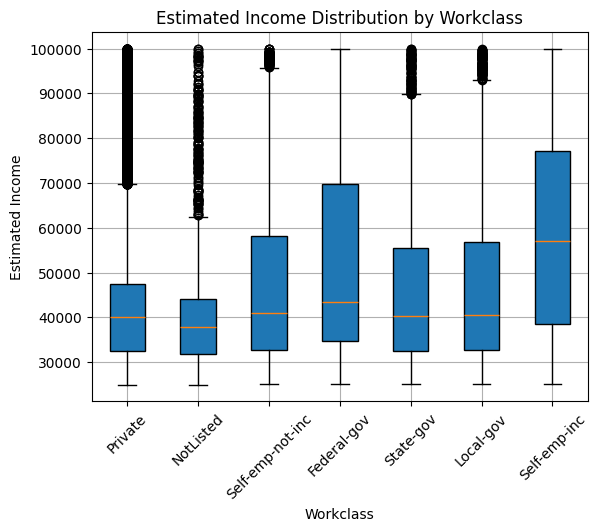

In [84]:
# Get unique workclasses
workclasses = df['workclass'].unique()

# Create list of income lists by workclass
income_by_class = [df[df['workclass'] == w]['estimated-income'] for w in workclasses]

# Plotting
plt.boxplot(income_by_class, tick_labels=workclasses, patch_artist=True)
plt.title('Estimated Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Estimated Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


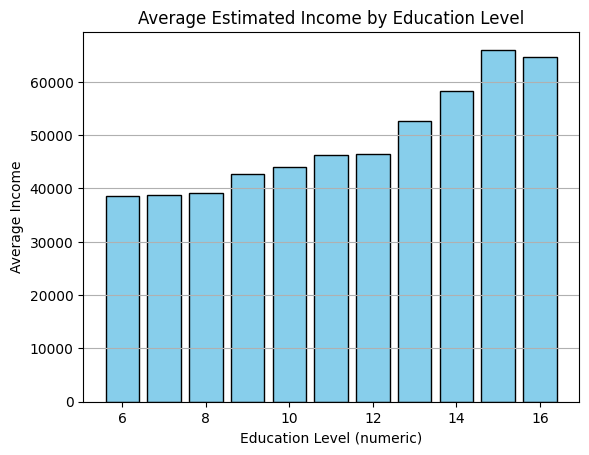

In [85]:
# Group by education level and calculate average income
avg_income_by_edu = df.groupby('educational-num')['estimated-income'].mean()

# Plotting
plt.bar(avg_income_by_edu.index, avg_income_by_edu.values, color='skyblue', edgecolor='black')
plt.title('Average Estimated Income by Education Level')
plt.xlabel('Education Level (numeric)')
plt.ylabel('Average Income')
plt.grid(True, axis='y')
plt.show()



# Label Encoding

In [87]:
#we need to encode all the non-numerical values into numerical values so that the ML model can be trained 
df

,age,workclass,educational-num,marital-status,occupation,gender,hours-per-week,native-country,estimated-income
0,25,Private,7,Never-married,Machine-op-inspct,Male,40,United-States,33966
1,38,Private,9,Married-civ-spouse,Farming-fishing,Male,50,United-States,43203
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Male,40,United-States,85393
4,18,NotListed,10,Never-married,Others,Female,30,United-States,38041
5,34,Private,6,Never-married,Other-service,Male,30,United-States,32136
...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Female,38,United-States,30500
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Male,40,United-States,65100
48839,58,Private,9,Widowed,Adm-clerical,Female,40,United-States,33053
48840,22,Private,9,Never-married,Adm-clerical,Male,20,United-States,25486


In [90]:
from sklearn.preprocessing import LabelEncoder                         #import libarary
encoder=LabelEncoder()                                                 #create object
df['workclass']=encoder.fit_transform(df['workclass'])             #7 categories   0,1, 2, 3, 4, 5, 6,
df['marital-status']=encoder.fit_transform(df['marital-status'])   #3 categories 0, 1, 2
df['occupation']=encoder.fit_transform(df['occupation'])
df['gender']=encoder.fit_transform(df['gender'])                   #2 catogories     0, 1
df['native-country']=encoder.fit_transform(df['native-country'])

In [91]:
df

,age,workclass,educational-num,marital-status,occupation,gender,hours-per-week,native-country,estimated-income
0,25,3,7,4,5,1,40,39,33966
1,38,3,9,2,3,1,50,39,43203
3,44,3,10,2,5,1,40,39,85393
4,18,2,10,4,7,0,30,39,38041
5,34,3,6,4,6,1,30,39,32136
...,...,...,...,...,...,...,...,...,...
48837,27,3,12,2,10,0,38,39,30500
48838,40,3,9,2,5,1,40,39,65100
48839,58,3,9,6,0,0,40,39,33053
48840,22,3,9,4,0,1,20,39,25486


## 🔄 Step 1: Separating Input Features and Output Labels

We separate the dataset into two parts (training, testing):
- `X` → the independent variables (features)    //input
- `y` → the target variable (label to predict)  //output


In [93]:
x=df.drop(columns=['estimated-income'])
y=df['estimated-income']

In [95]:
x

,age,workclass,educational-num,marital-status,occupation,gender,hours-per-week,native-country
0,25,3,7,4,5,1,40,39
1,38,3,9,2,3,1,50,39
3,44,3,10,2,5,1,40,39
4,18,2,10,4,7,0,30,39
5,34,3,6,4,6,1,30,39
...,...,...,...,...,...,...,...,...
48837,27,3,12,2,10,0,38,39
48838,40,3,9,2,5,1,40,39
48839,58,3,9,6,0,0,40,39
48840,22,3,9,4,0,1,20,39


In [96]:
y

0        33966
1        43203
3        85393
4        38041
5        32136
         ...  
48837    30500
48838    65100
48839    33053
48840    25486
48841    57191
Name: estimated-income, Length: 44833, dtype: int64

# Testing different ML algorithms

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "GradientBoosting": GradientBoostingRegressor()
}

# Store results
results = {}

# Train and evaluate
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "R2": r2}
    
    print(f"📌 {name} Performance:")
    print(f"➡️  Mean Absolute Error: {mae:.2f}")
    print(f"➡️  R² Score: {r2:.4f}")
    print("------")

📌 LinearRegression Performance:
➡️  Mean Absolute Error: 13341.90
➡️  R² Score: 0.1819
------
📌 RandomForest Performance:
➡️  Mean Absolute Error: 12837.01
➡️  R² Score: 0.1756
------
📌 KNN Performance:
➡️  Mean Absolute Error: 12701.88
➡️  R² Score: 0.1822
------
📌 SVR Performance:
➡️  Mean Absolute Error: 13509.08
➡️  R² Score: -0.0702
------
📌 GradientBoosting Performance:
➡️  Mean Absolute Error: 11962.35
➡️  R² Score: 0.3133
------


## Comparing models

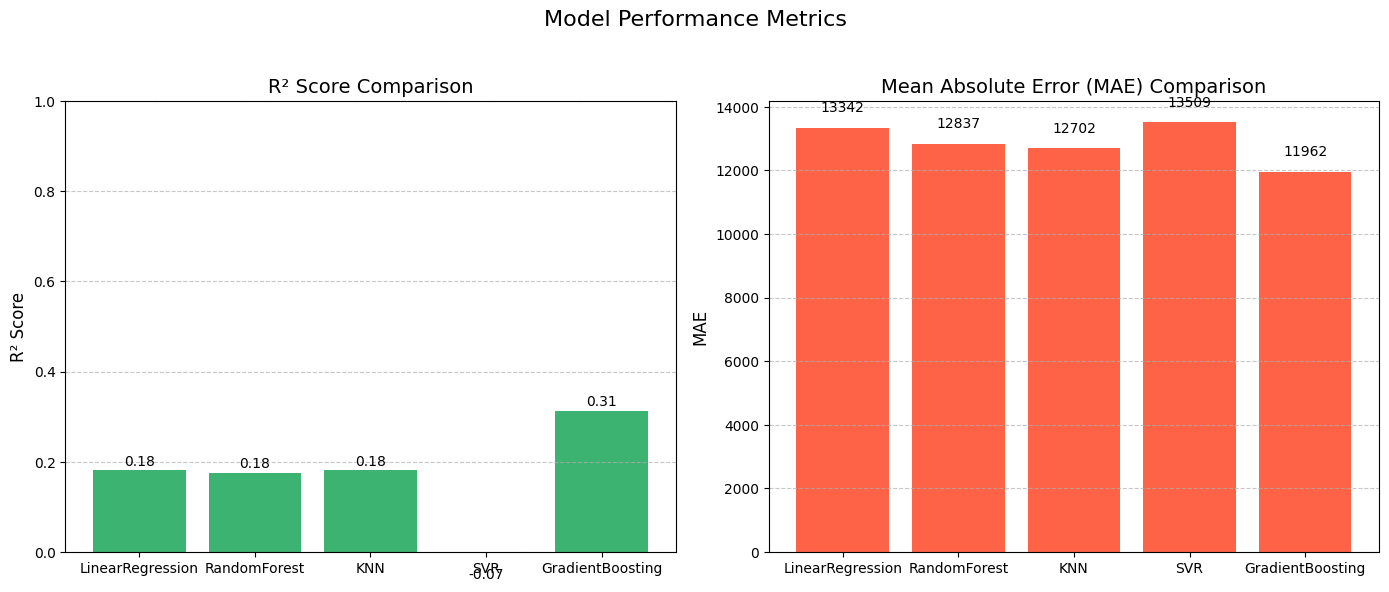

In [98]:
import matplotlib.pyplot as plt

# Extract model names, R² scores, and MAEs
model_names = list(results.keys())
r2_scores = [results[m]["R2"] for m in model_names]
mae_scores = [results[m]["MAE"] for m in model_names]

# Set up side-by-side plots
plt.figure(figsize=(14, 6))

# --- R² Score Plot ---
plt.subplot(1, 2, 1)
bars1 = plt.bar(model_names, r2_scores, color='mediumseagreen')
plt.title("R² Score Comparison", fontsize=14)
plt.ylabel("R² Score", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', fontsize=10)

# --- MAE Plot ---
plt.subplot(1, 2, 2)
bars2 = plt.bar(model_names, mae_scores, color='tomato')
plt.title("Mean Absolute Error (MAE) Comparison", fontsize=14)
plt.ylabel("MAE", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f"{yval:.0f}", ha='center', fontsize=10)

# Final layout
plt.suptitle("Model Performance Metrics", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 📌 Model Comparison Analysis & Best Model Selection
After training and evaluating multiple regression models — including Linear Regression, Random Forest, KNN, SVR, and Gradient Boosting — we analyzed their performance using two key metrics:

R² Score (Coefficient of Determination): Measures how well the model explains the variability of the target variable. Higher is better.

Mean Absolute Error (MAE): Represents the average absolute difference between predicted and actual salaries. Lower is better.

The results were also visualized using bar charts, which made it evident that the Gradient Boosting Regressor outperformed others with the highest R² score and lowest MAE.

Thus, we now proceed to finalize and save the Gradient Boosting model, as it provides the most accurate and reliable predictions for our salary estimation task.

In [99]:
import joblib

# Find the best model based on highest R²
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = models[best_model_name]

# Re-train best model on entire data (optional but good for final version)
best_model.fit(x, y)

# Save it
joblib.dump(best_model, "best_model_regression.pkl")
print(f"✅ Best model: {best_model_name} with R² = {results[best_model_name]['R2']:.4f}")
print("✅ Model saved as 'best_model_regression.pkl'")

✅ Best model: GradientBoosting with R² = 0.3133
✅ Model saved as 'best_model_regression.pkl'


# Code for Streamlit App

In [1]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load trained regression model
model = joblib.load("best_model_regression.pkl")

st.set_page_config(page_title="Employee Salary Predictor 💰", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Prediction App")
st.markdown("Estimate the expected salary of an employee based on input attributes.")

# Mapping dictionaries (based on your value_counts data)
workclass_map = {
    "Private": 3,
    "Self-emp-not-inc": 5,
    "Local-gov": 1,
    "State-gov": 2,
    "Without-pay": 6,
    "Self-emp-inc": 4,
    "Federal-gov": 0
}

marital_map = {
    "Never-married": 2,
    "Married-civ-spouse": 4,
    "Divorced": 0,
    "Separated": 5,
    "Married-spouse-absent": 6,
    "Widowed": 3,
    "Married-AF-spouse": 1
}

occupation_map = {
    "Prof-specialty": 8,
    "Craft-repair": 2,
    "Exec-managerial": 1,
    "Adm-clerical": 0,
    "Sales": 9,
    "Tech-support": 6,
    "Other-service": 5,
    "Machine-op-inspct": 7,
    "Transport-moving": 11,
    "Handlers-cleaners": 4,
    "Farming-fishing": 10,
    "Priv-house-serv": 3
}

gender_map = {"Male": 1, "Female": 0}

country_map = {
    "United-States": 39,
    "Mexico": 0,
    "Philippines": 26,
    "Germany": 30,
    "Canada": 11,
    "Cuba": 2,
    "India": 19,
    "Puerto-Rico": 33,
    "El-Salvador": 9,
    "South": 35,
    "China": 3,
    "Columbia": 5,
    "Jamaica": 23,
    "Japan": 24,
    "Italy": 22,
    "Dominican-Republic": 8,
    "Vietnam": 40,
    "Haiti": 31,
    "Guatemala": 4,
    "Honduras": 6,
    "Trinadad&Tobago": 36,
    "Laos": 14,
    "Peru": 20,
    "Cambodia": 12,
    "Iran": 29,
    "Nicaragua": 13,
    "Poland": 27,
    "Portugal": 32,
    "Ecuador": 7,
    "Scotland": 21,
    "France": 10,
    "Thailand": 37,
    "England": 1,
    "Yugoslavia": 17,
    "Taiwan": 28,
    "Outlying-US(Guam-USVI-etc)": 38,
    "Hong": 41,
    "Greece": 34,
    "Hungary": 25,
    "Ireland": 18,
    "Holand-Netherlands": 15,
    "Other": 16
}

education_map = {
    "10th": 6,
    "11th": 7,
    "12th": 8,
    "HS-grad": 9,
    "Some-college": 10,
    "Assoc-acdm": 11,
    "Assoc-voc": 12,
    "Bachelors": 13,
    "Masters": 14,
    "Doctorate": 15,
    "Prof-school": 16
}

# Sidebar Inputs
st.sidebar.header("Enter Employee Details")

age = st.sidebar.slider("Age", 18, 80, 30)
workclass = st.sidebar.selectbox("Workclass", list(workclass_map.keys()))
educ_label = st.sidebar.selectbox("Education Level", list(education_map.keys()))
marital_status = st.sidebar.selectbox("Marital Status", list(marital_map.keys()))
occupation = st.sidebar.selectbox("Occupation", list(occupation_map.keys()))
gender = st.sidebar.radio("Gender", list(gender_map.keys()))
hours_per_week = st.sidebar.slider("Hours per Week", 1, 100, 40)
country = st.sidebar.selectbox("Country", list(country_map.keys()))

# Input DataFrame (aligned to model features)
input_df = pd.DataFrame({
    'age': [age],
    'workclass': [workclass_map[workclass]],
    'educational-num': [education_map[educ_label]],
    'marital-status': [marital_map[marital_status]],
    'occupation': [occupation_map[occupation]],
    'gender': [gender_map[gender]],
    'hours-per-week': [hours_per_week],
    'native-country': [country_map[country]]
})

# Display DataFrame
disp_df = pd.DataFrame({
    'age': [age],
    'workclass': workclass,
    'educational-num': educ_label,
    'marital-status': marital_status,
    'occupation': occupation,
    'gender': gender,
    'hours-per-week': hours_per_week,
    'native-country': country
})

# Show input
st.write("### 🧾 Your Selected Inputs")
st.write(disp_df)
st.write("### 🧠 Processed Inputs for Model")
st.write(input_df)

# Predict Salary
if st.button("📊 Predict Salary"):
    prediction = model.predict(input_df)
    st.success(f"🧮 Estimated Salary: ₹{int(prediction[0]):,} per year")

# Optional: Batch prediction via CSV upload
st.markdown("---")
st.markdown("### 📂 Batch Salary Estimation")
uploaded_file = st.file_uploader("Upload a CSV file with employee data", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['Estimated_Income'] = batch_preds
    st.write("✅ Salary Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("📥 Download Salary Predictions", csv, file_name='estimated_incomes.csv', mime='text/csv')

# 📥 Input CSV Template
st.markdown("#### 📄 Download Input CSV Template")

template_df = pd.DataFrame({
    'age': [30],
    'workclass': [3],
    'educational-num': [10],
    'marital-status': [2],
    'occupation': [8],
    'gender': [1],
    'hours-per-week': [40],
    'native-country': [39]
})

csv = template_df.to_csv(index=False).encode('utf-8')
st.download_button("Download Template CSV", csv, file_name="input_template.csv", mime='text/csv')







Overwriting app.py


In [ ]:
!streamlit run app.py